### Team members

##### Chirag Bhuvaneshwara
* 2571703
* s8chbhuv@stud.uni-saarland.de

##### Priyasha Chatterjee 
* 2572739
* s8prchat@stud.uni-saarland.de

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import time
# import sounddevice as sd
# from scipy.io import wavfile
# import random
# from numpy import linalg as LA

In [ ]:
def directivity(X, theta, phi):
    
    R = 1
    s1 = R*math.cos(theta)*math.sin(phi)
    s2 = R*math.sin(theta)*math.sin(phi)
    s3 = R*math.cos(phi)
    c = 343
    
    w = 3500
    f = w/(2*math.pi)
    
    arrayManifoldVec = [s1,s2,s3]
    
    micLoc = [0,1,1]
    
    delays = []
    vVals = []
    for oneMic in X:
#         delays.append(np.dot(np.array(arrayManifoldVec), np.array(oneMic)) / c)
        delay = np.dot(np.array(arrayManifoldVec), np.array(oneMic)) / c
        vVals.append(math.exp(-1j*w*delay))
    
    
    
    

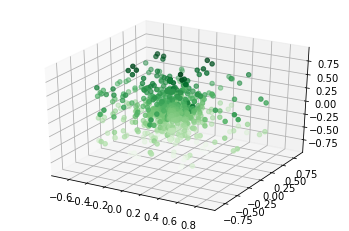

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def directivity(x,theta,phi):
    
    vel=330
    ome=3500
    sig=0
    sig_single=0
    r=(ome/vel)*np.asarray([np.cos(theta)*np.sin(phi),np.sin(theta)*np.sin(phi),np.cos(phi)])
    for i in range(360):
        sig_temp=0        
        for x_pos in x:
            sig_temp+=np.sin(i*(np.pi/180) + np.dot(r,np.asarray(x_pos)))
        sig+=(sig_temp**2)/25    
        sig_single+=np.sin(i*(np.pi/180))**2
        
    return sig/sig_single




#TESTCASE
    
x=[[0,0,1],[1,0,0],[0,1,0],[0,-1,0],[-1,0,0]]

num_bins=40

dir_=np.zeros((num_bins,num_bins))
theta=np.linspace(0,2*np.pi,num_bins)
phi=np.linspace(0,np.pi,num_bins)
dir_data=[]
x_data=[]
y_data=[]
z_data=[]

for count,i in enumerate(theta):
    for con,j in enumerate(phi):
        dirtemp=directivity(x,i,j)
        dir_data.append(dirtemp)
        x_data.append(dirtemp*np.cos(i)*np.sin(j))
        y_data.append(dirtemp*np.sin(i)*np.sin(j))
        z_data.append(dirtemp*np.cos(j))
        
                
#PLOT

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')    
ax.scatter3D(x_data, y_data, z_data, c=z_data, cmap='Greens')
plt.show()
        